In [1]:
import torch
import torch.nn as nn
import torchvision

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data',train=True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=100,
                                          shuffle=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False, transform=transform,download = True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=100,
                                         shuffle=False)
print(trainloader.__len__()*trainloader.batch_size, 'train samples')
print(testloader.__len__()*testloader.batch_size, 'test samples\n')

classes = ('zero' , 'one', 'two', 'three', 'four' , 'five' ,'six', 'seven' , 'eight' ,'nine')
c_len = len(classes)
print(c_len)

60000 train samples
10000 test samples

10


seven  nine three   two eight  five   one  four eight eight  five  four seven  nine  nine eight eight  zero seven   one   six   two  five   six  five   two three   two   one three  five seven  four  four  zero three  five eight  nine  four  nine   one  zero  five  five seven  zero  nine seven   one three   six  zero  four   one  four  nine  zero  four three   one  four eight seven seven  nine  four   one  nine   two seven seven three  nine  zero  five   two  five  five   one   one eight  four  five  zero  five   six eight  nine  five  nine   one   two three eight  four  zero  zero three   six


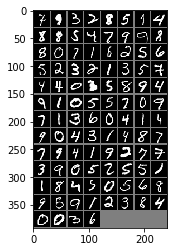

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(100)))

In [16]:
feature_length = 28 #length of features at a time step
input_size = 28 #time-steps length
output_size = c_len #number of classes
num_layers = 1
hidden_size = 64

In [17]:
class RNN(nn.Module):
    def __init__(self, input_size, feature_length, num_layers, output_size):
        super(RNN, self).__init__()
        # define all the components that will be used in the NN (these can be reused)
        self.rnn = nn.RNN(input_size,hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # define the acutal network
        h0 = torch.zeros(num_layers, x.size(0), hidden_size)
        output, _ = self.rnn(x, h0) 
        output = self.fc(output[:, -1, :])
        return output
        

rnn = RNN(input_size, feature_length, num_layers, output_size)
print(rnn)

RNN(
  (rnn): RNN(28, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=10, bias=True)
)


In [20]:
import torch.optim as optim


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.001)

In [23]:
 num_epochs = 4
# Train the model
total_step = len(trainloader)
for epoch in range(num_epochs):
    
    running_loss = 0.0
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.reshape(-1, feature_length, input_size)
        labels = labels
        
        
        # forward + backward + optimize
        outputs = rnn(images)
        loss = criterion(outputs, labels)     
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
          
      # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')
       
    
  

[1,   200] loss: 0.278
[1,   400] loss: 0.270
[1,   600] loss: 0.259
[2,   200] loss: 0.261
[2,   400] loss: 0.244
[2,   600] loss: 0.242
[3,   200] loss: 0.226
[3,   400] loss: 0.226
[3,   600] loss: 0.221
[4,   200] loss: 0.206
[4,   400] loss: 0.211
[4,   600] loss: 0.208
Finished Training


In [24]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images = images.reshape(-1, feature_length, input_size)
        labels = labels
        outputs = rnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %
